In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
# creating fonction that normalize the sub-categs
def norm(tab): 
    if len(tab) > 1:
        max  = np.array(tab).max()
        min = np.array(tab).min()
        return [round((x - min) / (max-min) ,3) for x in tab]
    else : 
        return [1]

def norm_categ_lvl2(dict_categ): 
    for k,v in dict_categ.items(): 
        tab = norm([v for k,v  in v.items()])
        dict_categ[k] ={k:v for (k,_),v in zip(v.items(),tab)}
    return dict_categ

In [29]:
raw_data = pd.read_csv('/Users/namchangseok/Desktop/코드스테이츠/AI_12기/cp2/split_data.csv')

In [30]:
raw_data.dropna(inplace=True)
raw_data["category_lvl1"] = raw_data["category_code"].apply(lambda x : x.split(".")[0])
raw_data["category_lvl2"] = raw_data["category_code"].apply(lambda x : x.split(".")[1])
raw_data.reset_index(drop = True,inplace=True)
only_purchases = raw_data.loc[raw_data.event_type == 'purchase']

In [31]:
top_sellers = only_purchases.groupby('brand')["price", "brand"].sum().sort_values(by="price", ascending=False)
top_sellers.reset_index(inplace=True)
top_sellers.rename(columns={"price":"sum_price"}, inplace=True)
top_sellers.head(10)

/var/folders/z3/56kysp1d32z1yg2cpszy0h1h0000gn/T/ipykernel_25807/3324145896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_sellers = only_purchases.groupby('brand')["price", "brand"].sum().sort_values(by="price", ascending=False)


,brand,sum_price
0,apple,5539480.84
1,samsung,2350646.75
2,xiaomi,453878.30
3,huawei,241681.74
4,acer,191066.21
5,lg,176689.82
6,oppo,120322.33
7,lenovo,83307.91
8,indesit,73075.22
9,hp,60327.06


(-1.1126377708207924, 1.1006018011741334, -1.10903685632498, 1.113175060416557)

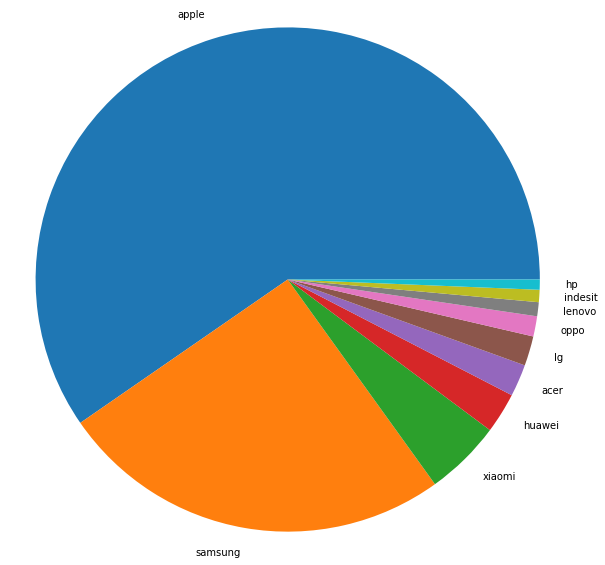

In [32]:
plt.figure(figsize=(10,10))
plt.pie(top_sellers['sum_price'].head(10),labels=top_sellers["brand"].head(10))
plt.axis('equal')


In [33]:
purchases_with_brands = only_purchases.loc[only_purchases.brand.notnull()]
top_sellers_count = purchases_with_brands.groupby('brand').brand.agg([len]).sort_values(by="len", ascending=False)
top_sellers_count.reset_index(inplace=True)
top_sellers_count.rename(columns={"len" : "n°sales/brand"}, inplace=True)

(-1.1123540917551096,
 1.1005882900835766,
 -1.1076598301944962,
 1.1186394796548935)

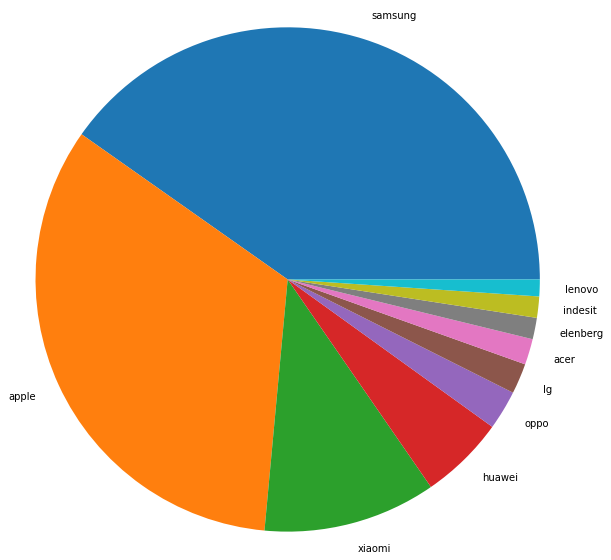

In [34]:
plt.figure(figsize=(10,10))
plt.pie(top_sellers_count["n°sales/brand"].head(10),labels=top_sellers_count["brand"].head(10))
plt.axis('equal')

In [35]:
# Normalize the sales per brand between 0 and 1
sales_list  = [x[1] for x in zip(top_sellers_count["brand"], top_sellers_count["n°sales/brand"])]
n_sales_brand_norm =pd.Series( norm(sales_list),name="n°sales/brand")
n_sales_brand_norm = pd.concat([top_sellers_count["brand"], n_sales_brand_norm],axis=1)
n_sales_brand_norm

,brand,n°sales/brand
0,samsung,1.000
1,apple,0.828
2,xiaomi,0.275
3,huawei,0.135
4,oppo,0.063
...,...,...
529,obi,0.000
530,obsessive,0.000
531,olto,0.000
532,e-blue,0.000


In [36]:
# 카테고리별 얼마나 팔린지 확인

category_lvl1_purshace = purchases_with_brands.groupby("category_lvl1")["category_lvl1"].agg([len]).sort_values(by="len", ascending=False)
category_lvl1_purshace.reset_index(inplace=True)
category_lvl1_purshace.rename(columns={"len":"n°sales/category"}, inplace=True)

(-1.1043252718014835,
 1.1002059653238803,
 -1.1046529908828329,
 1.1051945576035218)

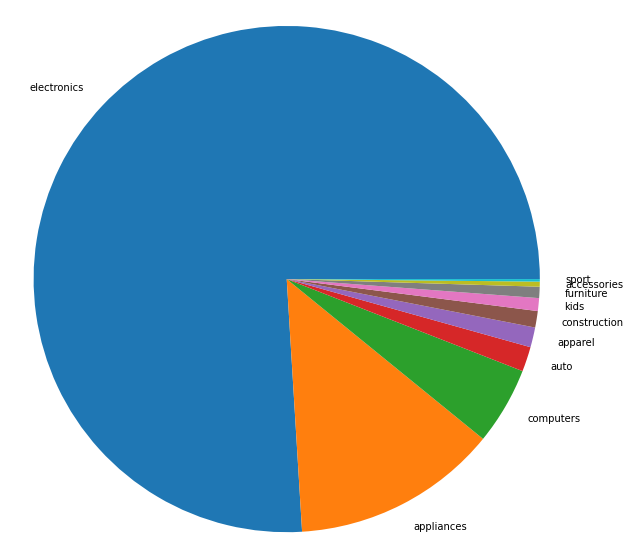

In [37]:
#시각화

plt.figure(figsize=(10,10))
plt.pie(category_lvl1_purshace["n°sales/category"].head(10),labels=category_lvl1_purshace["category_lvl1"].head(10))
plt.axis('equal')


In [38]:
# Normelize the number of sales between 0 and 1

n_sales_categ_lvl1  = [x[1] for x in zip(category_lvl1_purshace["category_lvl1"], category_lvl1_purshace["n°sales/category"])]
n_sales_categ_lvl1_norm = norm(n_sales_categ_lvl1)
categ_lvl1_norm = pd.concat([category_lvl1_purshace["category_lvl1"],pd.Series(n_sales_categ_lvl1_norm,name="weight_lvl1")],axis=1)
categ_lvl1_norm

,category_lvl1,weight_lvl1
0,electronics,1.000
1,appliances,0.173
2,computers,0.065
3,auto,0.021
4,apparel,0.016
5,construction,0.014
6,kids,0.011
7,furniture,0.009
8,accessories,0.004
9,sport,0.002


In [39]:
category_lvl2_ = purchases_with_brands.groupby(["category_lvl1","category_lvl2"])["category_lvl2"].agg([len])
category_lvl2_.reset_index(inplace=True)

In [40]:
categories =set(category_lvl2_["category_lvl1"])
dict_categ = {}
for categ in categories: 
    dict_categ[categ] = dict(np.array(category_lvl2_[category_lvl2_["category_lvl1"]== categ]  [  ["category_lvl2",'len']  ]))
dict_categ_norm = norm_categ_lvl2(dict_categ)

categ_lvl2_norm = []
for k,v in dict_categ_norm.items():
    [categ_lvl2_norm.append((k_,v_)) for k_,v_ in v.items()]

categ_lvl2_norm = dict(categ_lvl2_norm)
categ_lvl2_norm

{'accessories': 1,
 'cultivator': 0.0,
 'lawn_mower': 1.0,
 'carriage': 1.0,
 'dolls': 0.0,
 'fmcg': 0.318,
 'skates': 0.216,
 'swing': 0.148,
 'toys': 0.295,
 'components': 0.176,
 'tools': 1,
 'cartrige': 1,
 'environment': 0.36,
 'iron': 0.067,
 'ironing_board': 0.0,
 'kitchen': 0.797,
 'personal': 0.04,
 'sewing_machine': 0.029,
 'bathroom': 0.156,
 'bedroom': 1.0,
 'living_room': 0.938,
 'universal': 0.0,
 'costume': 0.012,
 'jacket': 0.0,
 'scarf': 0.0,
 'shirt': 0.006,
 'shoes': 1.0,
 'sock': 0.0,
 'tshirt': 0.006,
 'underwear': 0.009,
 'bicycle': 1.0,
 'ski': 0.0,
 'trainer': 0.385,
 'desktop': 0.222,
 'ebooks': 0.0,
 'notebook': 1.0,
 'peripherals': 0.311,
 'bag': 1.0,
 'umbrella': 0.0,
 'wallet': 0.361,
 'audio': 0.1,
 'camera': 0.0,
 'clocks': 0.05,
 'smartphone': 1.0,
 'tablet': 0.015,
 'telephone': 0.008,
 'video': 0.062}

In [41]:
keys = pd.Series([k for k,_ in categ_lvl2_norm.items()],name="category_lvl2")
values = pd.Series([v for  _,v in categ_lvl2_norm.items()],name="weight_lvl2")
categ_lvl2_norm = pd.concat([keys,values],axis=1)
categ_lvl2_norm.head()

,category_lvl2,weight_lvl2
0,accessories,1.0
1,cultivator,0.0
2,lawn_mower,1.0
3,carriage,1.0
4,dolls,0.0


In [42]:
product_sales = purchases_with_brands.groupby("product_id")["product_id"].agg([len]).sort_values(by="len", ascending=False)
product_sales.reset_index(inplace=True)
product_sales.rename(columns={"len":"n°sales/product"}, inplace=True)
product_sales

,product_id,n°sales/product
0,1004856,1471
1,1004767,1059
2,1004833,633
3,4804056,614
4,1005115,605
...,...,...
4256,4502329,1
4257,4502339,1
4258,4502496,1
4259,4502588,1


In [47]:
def transform_y_to_classes(x):
    if (x < 10):
        return "very bad"
    elif (x < 40):
        return "bad"
    elif (x < 80):
        return "medium"
    elif (x < 200):
        return "good"
    elif (x < 500):
        return "very good"
    else:
        return "excellent"

In [48]:
# We transform the numeric value of n°sales/product to classes 
product_sales["product rate"] = product_sales["n°sales/product"].apply(lambda x : transform_y_to_classes(x))
product_sales

,product_id,n°sales/product,product rate
0,1004856,1471,excellent
1,1004767,1059,excellent
2,1004833,633,excellent
3,4804056,614,excellent
4,1005115,605,excellent
...,...,...,...
4256,4502329,1,very bad
4257,4502339,1,very bad
4258,4502496,1,very bad
4259,4502588,1,very bad


In [49]:
df = pd.merge(raw_data,n_sales_brand_norm,on="brand")
df = pd.merge(df, categ_lvl1_norm,on="category_lvl1")
df = pd.merge(df,categ_lvl2_norm,on="category_lvl2")
df = pd.merge(df,product_sales.drop("n°sales/product", axis=1),on="product_id")
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_lvl1,category_lvl2,n°sales/brand,weight_lvl1,weight_lvl2,product rate
0,967698,2019-10-01 16:36:32 UTC,view,21406647,2053013561579406073,electronics.clocks,tissot,1580.48,516909830,60762fb3-783c-48ae-a96e-0d7317c0be64,electronics,clocks,0.001,1.0,0.05,very bad
1,12288898,2019-10-10 13:45:39 UTC,view,21406647,2053013561579406073,electronics.clocks,tissot,1580.48,558826536,3846736d-1457-48d8-b004-3599e5ff9f61,electronics,clocks,0.001,1.0,0.05,very bad
2,1812963,2019-10-02 11:12:38 UTC,view,21406647,2053013561579406073,electronics.clocks,tissot,1580.48,555581244,d6022a43-c78f-4e71-ac3d-415d9fe19b83,electronics,clocks,0.001,1.0,0.05,very bad
3,16918073,2019-10-13 14:38:31 UTC,view,21406647,2053013561579406073,electronics.clocks,tissot,1580.48,514995621,17e3dc5e-7d63-48d0-8468-d7b15db32c73,electronics,clocks,0.001,1.0,0.05,very bad
4,11202563,2019-10-09 15:51:58 UTC,purchase,21406647,2053013561579406073,electronics.clocks,tissot,1580.48,558502124,e051b02b-e300-4e2a-8f4c-52ed680a804d,electronics,clocks,0.001,1.0,0.05,very bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000106,14586492,2019-10-12 05:43:27 UTC,view,30500001,2053013559985570467,country_yard.cultivator,huter,297.54,515772708,edd264e1-1ffa-456f-904b-1f640cbc7e18,country_yard,cultivator,0.006,0.0,0.00,very bad
1000107,35639048,2019-10-26 14:29:24 UTC,view,30500001,2053013559985570467,country_yard.cultivator,huter,308.89,524881280,97e1c98c-4e95-4fcc-9401-ec917965ee61,country_yard,cultivator,0.006,0.0,0.00,very bad
1000108,28381159,2019-10-21 10:18:29 UTC,view,30500001,2053013559985570467,country_yard.cultivator,huter,297.54,536345481,015d3a40-7fd4-4ab4-bff6-b161c147e06d,country_yard,cultivator,0.006,0.0,0.00,very bad
1000109,34220875,2019-10-25 14:07:59 UTC,view,30500001,2053013559985570467,country_yard.cultivator,huter,308.89,517934354,bf8e84d0-5f9e-48ba-ad44-47a3aefd99d9,country_yard,cultivator,0.006,0.0,0.00,very bad
